### Perkenalan

Nama: Sivi Almanaf Ali Shahab
Batch: 006

**Problem Statement**

Jumlah penderita diabetes pada tahun 2021 di Indonesia merupakan jumlah terbesar kelima di dunia setelah Tiongkok, India, Pakistan, dan Amerika Serikat. Jumlah pengidap diabetes di Indonesia sebanyak 19,47 juta atau 10,6% dari penduduk Indonesia. International Diabetes Federation (IDF) memperkirakan masih ada 44% orang dewasa pengidap diabetes yang belum didiagnosis. Pencegahan merupakan cara yang paling efektif untuk mengurangi resiko yang fatal akibat diabetes, model machine learning ini dibuat untuk mendeteksi sesorang mempunyai resiko diabetes agar sesegera mungkin dilakukan pencegahan agar masyarakat tetap bisa hidup sehat dengan melakukan beberapa treatment yang disarankan oleh dokter. Pencegahan bisa berupa penyuluhan tentang pola hidup sehat, menghambat timbulnya penyulit pasien yang terdiagnosis DM, atau mencegah terjadinya kecacatan lebih lanjut serta meningkatkan kualitas hidup.

Source:

https://databoks.katadata.co.id/datapublish/2021/11/22/jumlah-penderita-diabetes-indonesia-terbesar-kelima-di-dunia
http://www.stikestelogorejo.ac.id/2018/12/08/mengenal-lebih-dekat-diabetes-melitus/


**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


**Data Information**

Variabel Independen (X):

Pregnancies : Number of times pregnant (mempresentasikan berapa kali wanita tersebut hamil selama hidupnya)

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mempresentasikan konsentrasi glukosa plasma pada 2 jam dalam tes toleransi glukosa).

Blood Pressure: Diastolic blood pressure (Tekanan darah adalah cara yang sangat terkenal untuk mengukur kesehatan jantung seseorang, ada juga ukuran tekanan darah yaitu diastolik dan sistolik. Dalam 
data ini, kita memiliki tekanan darah diastolik dalam (mm / Hg) ketika jantung rileks setelah kontraksi).

Skin Thickness: Triceps skin fold thickness (nilai yang digunakan untuk memperkirakan lemak tubuh (mm) yang diukur pada lengan kanan setengah antara proses olecranon dari siku dan proses akromial skapula).

Insulin: 2-Hour serum insulin (tingkat insulin 2 jam insulin serum dalam satuan mu U/ml)

BMI: Body mass index (Indeks Massa Tubuh (berat dalam kg / (tinggi dalam meter kuadrat), dan merupakan indikator kesehatan seseorang).

Diabetes Pedigree Function: Diabetes pedigree function (indikator riwayat diabetes dalam keluarga)

Age: umur wanita suku indian pima (years)

Variabel Dependen (Y) :

Outcome: Class variable (0 or 1), 0 untuk tidak mengidap diabetes, dan 1 mengidap diabetes.


### Import pustaka yang dibutuhkan

In [692]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')




pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Data Loading

In [693]:
data = pd.read_csv('https://raw.githubusercontent.com/sivi-shahab/FTDS-HACKTIV8-Batch006/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [694]:
# Check Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [695]:
# Check Ukuran data
data.shape

(768, 9)

Data mempunyai 768 rows dan 9 columns

In [696]:
# Check Missing Values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data tidak mempunyai missing values

In [697]:
# Check Proporsional data
data['Outcome'].value_counts()/len(data)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

Proporsi data untuk bukan penderita diabetes 65% sedangkan untuk penderita diabetes 35%. Dari informasi ini didapatkan data termasuk kategori data yang balance

### Data Cleaning

In [698]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Setelah dilakukan analisa lebih lanjut terdapat nilai minimum yang mecurigakan nilainya sama dengan 0 pada features Glucose, BloodPressure, SkinThickness, Insulin, dan BMI. Selanjutnya kita akan ganti nilai 0 dengan NaN sehingga diperoleh missing values

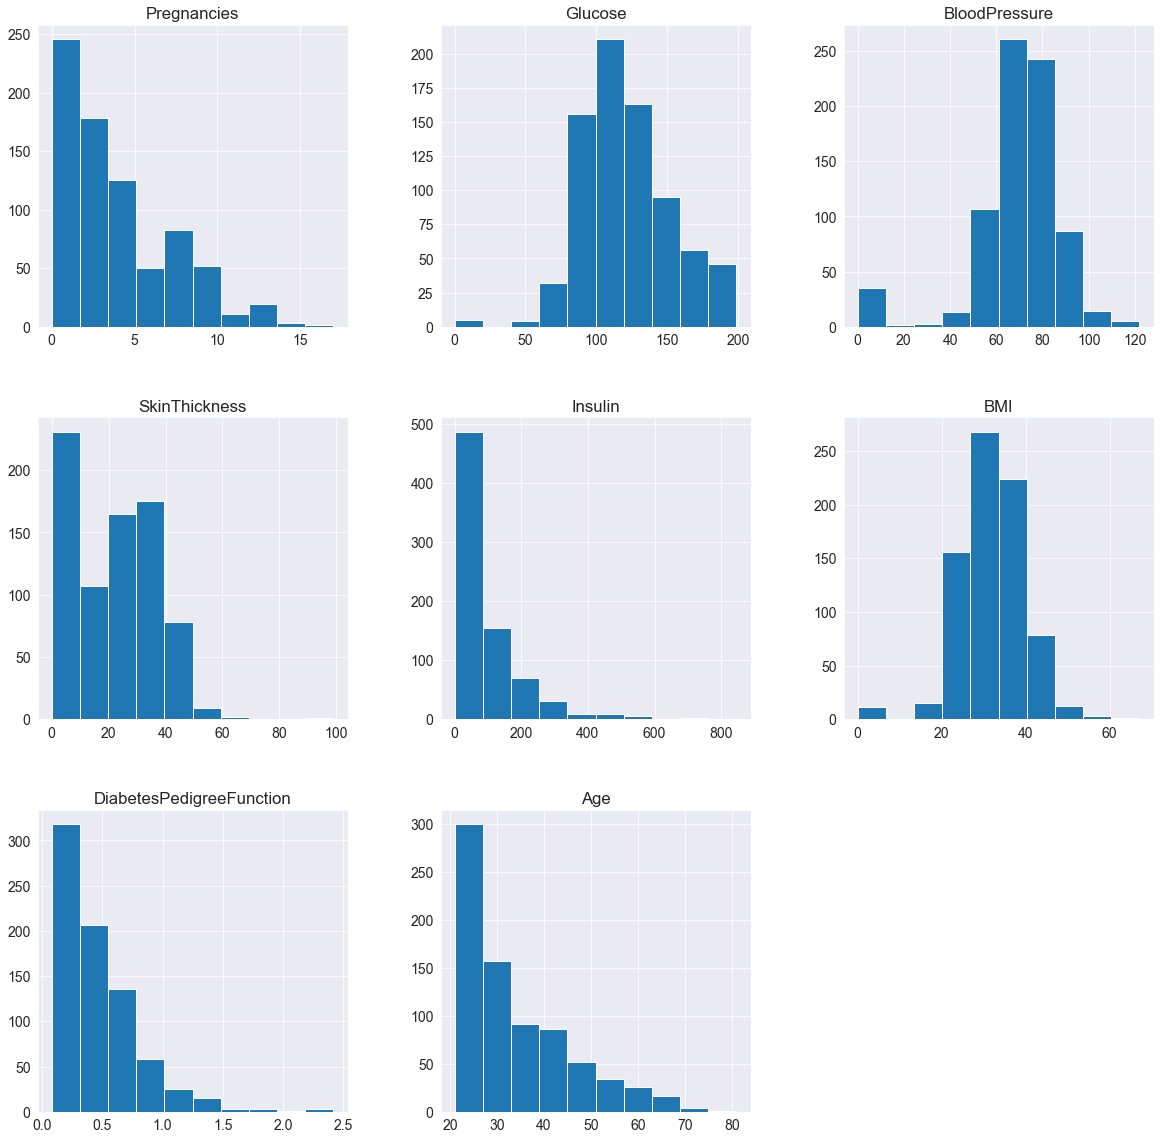

In [699]:
# Distribusi plot dari masing-masing features
p = data.iloc[:, :-1].hist(figsize = (20,20))

Distribusi dari data dari setiap features bisa dikatakan skewness, namun kita perlu mengecek lebih lanjut data yang missing

In [700]:
df = data.copy()

#### Handling Outlier

##### Identify Outlier

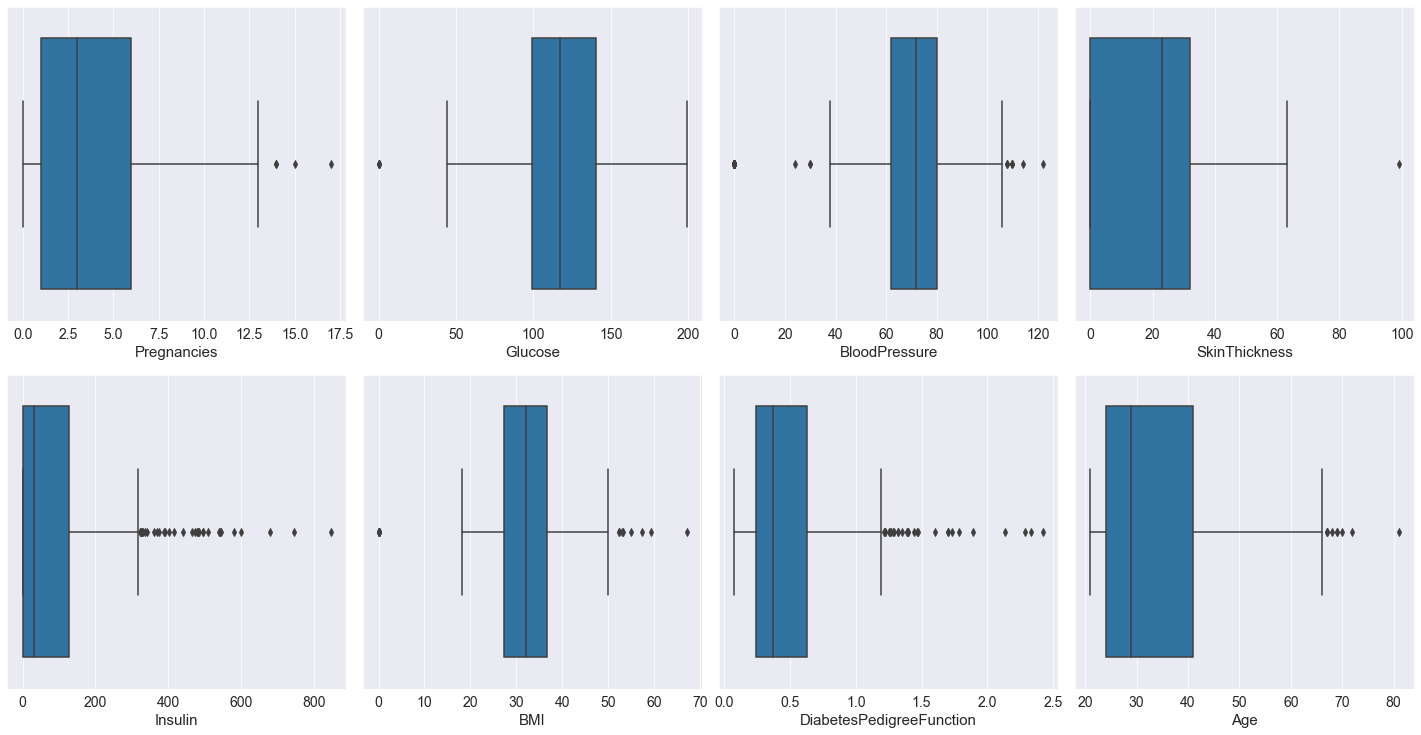

In [701]:
names = df.iloc[:, :-1]
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in names:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(names[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

##### Remove Outlier

Untuk menangani outlier kita perlu perhatikan fakta yang ada dan juga batasan masalah yang kita tentukan

1. BloodPressure

   Normalnya orang dewasa akan memiliki tekanan darah normal di angka 120/80 mmHg. Dari informasi ini kita akan gunakan sebagai argumen untuk menghapus outlier yang merupakan batas bawah

In [702]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
print("Q1:", Q1)
print("Q1:", Q3)
IQR = Q3 - Q1
print("IQR: ", IQR)
lower_limit_bp = Q1 - 1.5*IQR
upper_limit_bp = Q3 + 1.5*IQR
print("Batas Bawah: ", lower_limit_bp)
print("Batas Atas: ", upper_limit_bp)

Q1: 62.0
Q1: 80.0
IQR:  18.0
Batas Bawah:  35.0
Batas Atas:  107.0


In [703]:
df = df[(df.BloodPressure>lower_limit_bp)]

2. Pregnancies

    Kita batasi masalah dengan jumlah maksimal melahirkan adalah 13 kali, jarang sekali ditemukan bahwa perempuan melahirkan lebih dari 13 kali

In [704]:
df = df[df.Pregnancies <= 13]

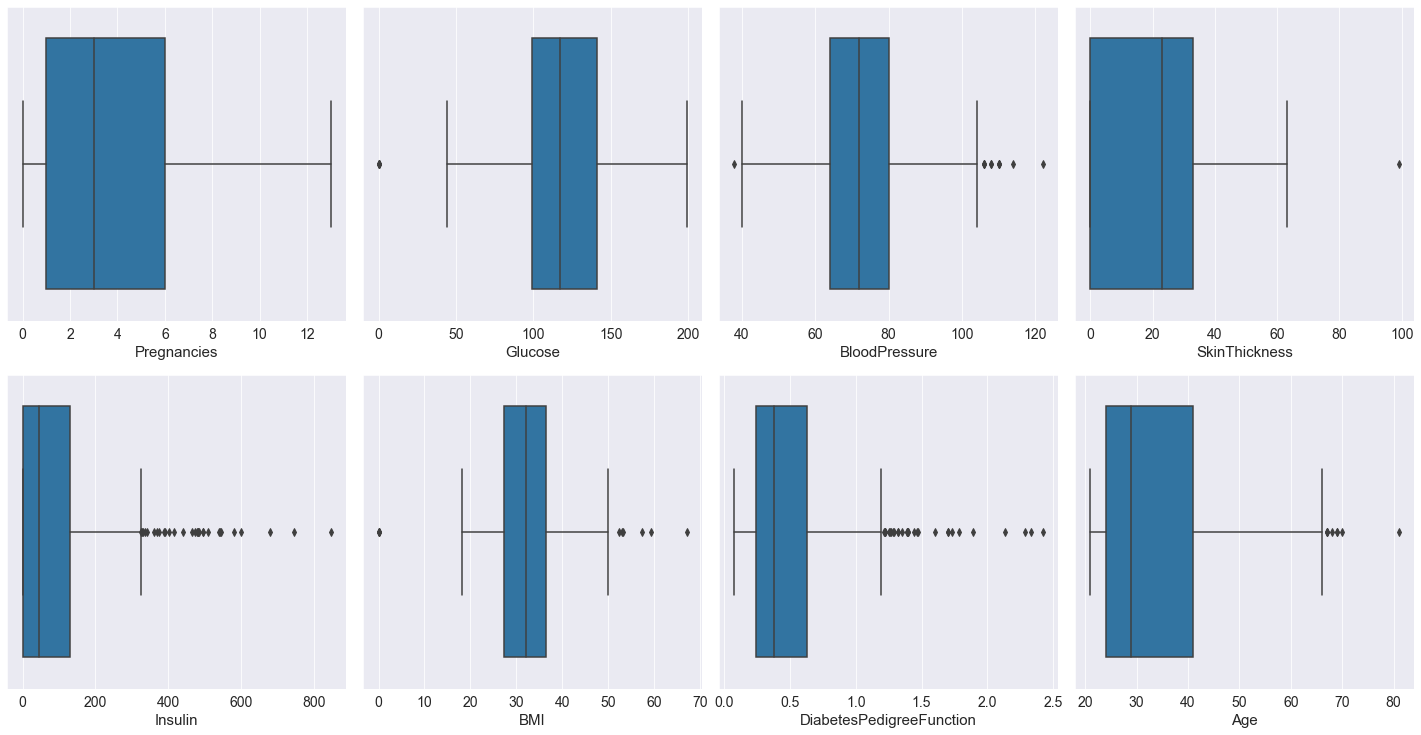

In [680]:
names = df.iloc[:, :-1]
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in names:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(names[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Handling Missing Values

Deteksi input 0 pada beberapa features adalah missing values

In [705]:
df_infinity = data.copy()
df_infinity[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_infinity[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [706]:
df_infinity.isnull().sum()/len(df_infinity)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Terdapat bug di numpy yaitu np.nan = infinite (terdeteksi infinite), sehingga kita akan ganti np.nan dengan sebuah angka 999

In [707]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, 999)

Berdasarakan pengetahuan penulis dengan Mempertimbangkan bahwa SkinThickness adalah faktor penting untuk penderita diabetes meskipun missing values 29.6% maka kita akan tetap melanjutkan handling missing values untuk data features tersebut sedangkan untuk feature Insulin kita akan hapus karena nilai missing mendekati 50% 

In [708]:
df.drop(['Insulin'], axis=1, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,999,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


In [709]:
df.to_csv(r'./diabetes_data.csv')

### Explorasi Data

#### Heatmap Correlation

In [710]:
DATA_URL = 'https://raw.githubusercontent.com/sivi-shahab/FTDS-HACKTIV8-Batch006/main/diabetes_data.csv'


def load_data():
    dataframe = pd.read_csv(DATA_URL)
    lowercase = lambda x: str(x).lower()
    dataframe.rename(lowercase, axis='columns', inplace=True)
    dataframe.drop(['unnamed: 0'], inplace=True, axis=1)
    return dataframe

In [711]:
df = load_data()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,999,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


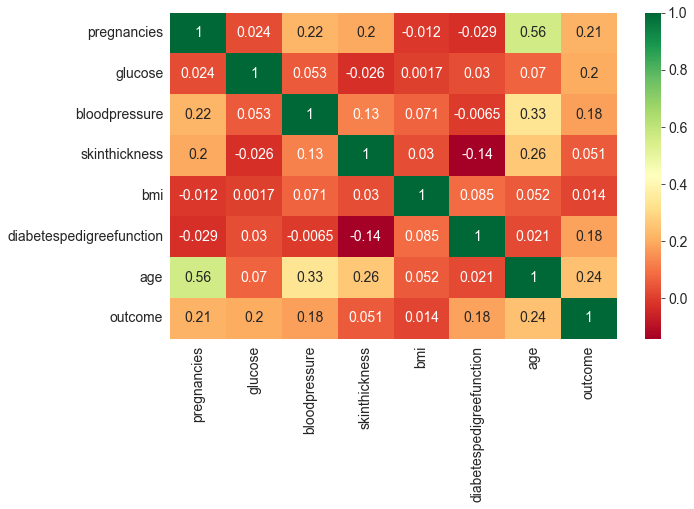

In [688]:
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

Age, Age, BMI dan  Pregnancies merupakan features yang memiliki korelasi paling tinggi secara berurutan dengan pasien diabetes. Namun kita perlu lihat lagi nilai korelasi nya setelah impute missing values 

**Pregnancies VS Diabetes**

In [773]:
data_pregnancies_Outcome = data.groupby(['Pregnancies', 'Outcome'])['Age'].count()

In [774]:
data_pregnancies_Outcome = pd.DataFrame(data_pregnancies_Outcome).reset_index()
data_pregnancies_Outcome = data_pregnancies_Outcome.rename(columns={'Age': 'Total'})
data_pregnancies_Outcome.head()


,Pregnancies,Outcome,Total
0,0,0,73
1,0,1,38
2,1,0,106
3,1,1,29
4,2,0,84


In [775]:
data_pregnancies_Outcome = data_pregnancies_Outcome[data_pregnancies_Outcome['Pregnancies']<13]

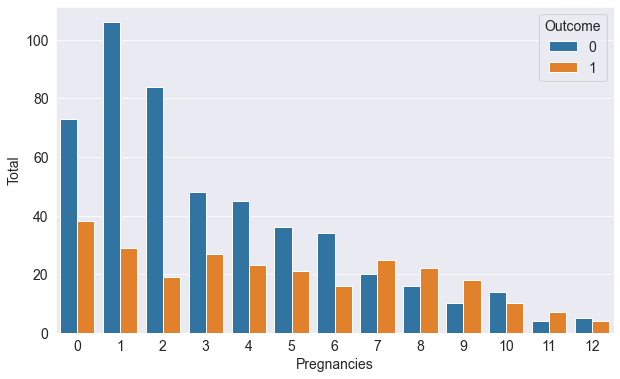

In [776]:
ax = sns.barplot(x="Pregnancies", y="Total", data=data_pregnancies_Outcome, hue='Outcome')

Dari data diatas bahwa perempuan yang melahirkan lebih dari 7 kali proporsi antara pasien diabetes dan bukan pasien diabetes diperoleh rata-rata lebih banyak pasien diabetes  

In [778]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**DiabetesPedigreeFunction VS Age**

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Age'>

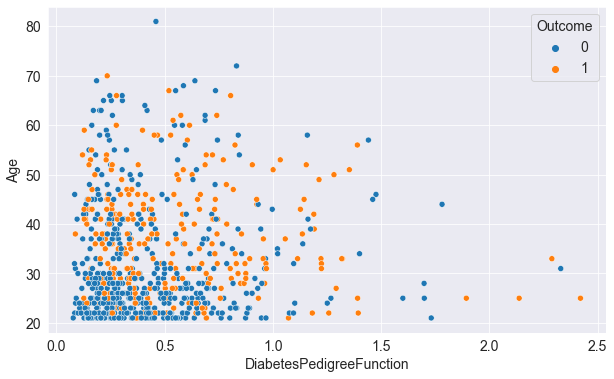

In [781]:
sns.scatterplot(data=data, x="DiabetesPedigreeFunction", y="Age", hue="Outcome")

Pasien diabetes untuk indikator DiabetesPedigreeFunction terbanyak pada rentang 0-1, semakin usia bertambah semakin banyak pasien diabetes

**Glucose VS Age**

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

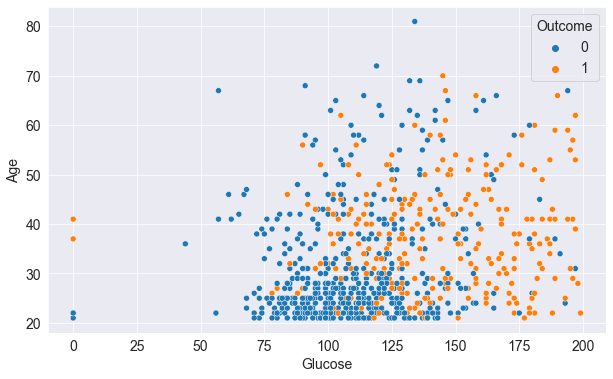

In [712]:
sns.scatterplot(data=data, x="Glucose", y="Age", hue="Outcome")

Dari sebaran data bisa diperoleh hasil bahwa glucose dengan age adalah faktor yang sangat berpengaruh terhadap diabetes glucose semakin tinggi dikiuti dengan usia yang semakin bertambah semakin banyak pasien diabetes 

**Glucose VS BloodPressure**

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

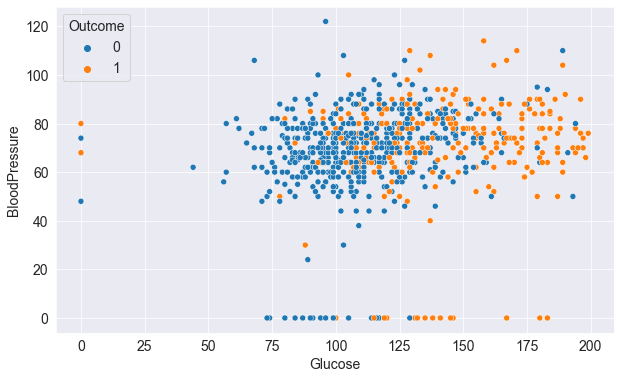

In [713]:
sns.scatterplot(data=data, x="Glucose", y="BloodPressure", hue="Outcome")

Karena data masih banyak yang missing informasi yang kita dapatkan masih belum terlihat jelas apakah ada korelasi antara glucose dengan bloodpressure

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

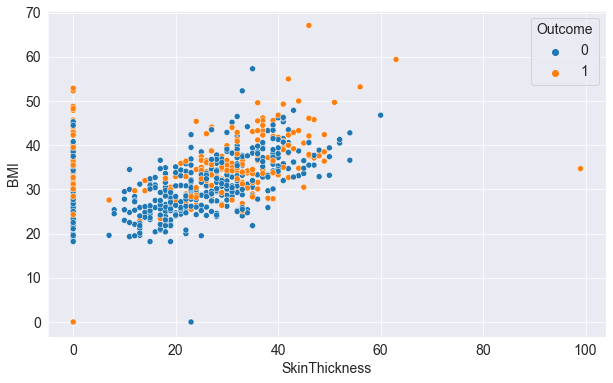

In [714]:
sns.scatterplot(data=data, x="SkinThickness", y="BMI", hue="Outcome")

SkinThickness dan BMI memiliki korelasi yang tinggi dan positif artinya semakin tinggi SkinThickness semakin tinggi BMI memiliki resiko diabetes yang tinggi

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

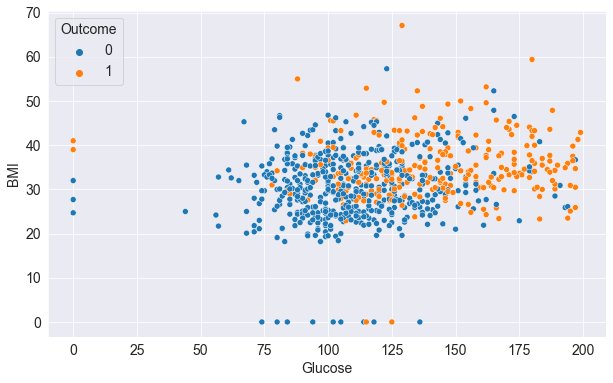

In [715]:
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="Outcome")

Glucose dan BMI memiliki korelasi namun tidak signifikan tapi masih bisa dikatakan semakin tinggi Glucose semakin tinggi BMI memiliki resiko diabetes yang tinggi

### Data Preprocessing

In [508]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,999,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


In [520]:
X = df.iloc[:, :-1]
y = df['outcome']

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [526]:
imputer = Pipeline([
  ("imputer", SimpleImputer(missing_values=999, strategy='median'))

])
preprocessor = ColumnTransformer([
                                ("imputer", imputer, ['glucose', 'skinthickness', 'bmi']),
                                ("scaler", StandardScaler(), X.columns)
                                  
                                  ])

### Pendefinisian Model

In [527]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
adaboost = AdaBoostClassifier()

In [528]:
pipeline_logreg = Pipeline([
                      ("prep_logreg", preprocessor),
                      ("algo_logreg", logreg)
                      ])

pipeline_knn = Pipeline([
                      ("prep_knn", preprocessor),
                      ("algo_knn", knn)
                      ])

pipeline_tree = Pipeline([
                      ("prep_tree", preprocessor),
                      ("algo_tree", tree)
                      ])

pipeline_rf = Pipeline([
                      ("prep_rf", preprocessor),
                      ("algo_rf", rf)
                      ])

pipeline_nb = Pipeline([
                      ("prep_nb", preprocessor),
                      ("algo_nb", nb)
                      ])
pipeline_adaboost = Pipeline([
                      ("prep_adaboost", preprocessor),
                      ("algo_adaboost", adaboost)
                      ])

### Pelatihan Model

#### Base Model

Kita pilih model logistic regression sebagai base model sebagai patokan awal untuk seleksi features dengan menggunakan correlation 

In [529]:
base_logreg_model = pipeline_logreg.fit(X_train, y_train)

In [531]:
print("Accuracy_Score Logistic Regression: ", base_logreg_model.score(X_train, y_train))
print('-'*100)

Accuracy_Score Logistic Regression:  0.7586206896551724
----------------------------------------------------------------------------------------------------


In [533]:
X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns= X_train.columns)
X_train_imputed.head()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,diabetespedigreefunction,age
0,2.0,100.0,68.0,25.0,38.5,0.324,26.0
1,3.0,122.0,78.0,29.0,23.0,0.254,40.0
2,1.0,143.0,84.0,23.0,42.4,1.076,22.0
3,2.0,146.0,76.0,35.0,38.2,0.329,29.0
4,4.0,129.0,86.0,20.0,35.1,0.231,23.0


In [542]:
X_train_imputed['outcome'] = y_train.values
X_train_imputed.head()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,diabetespedigreefunction,age,outcome
0,2.0,100.0,68.0,25.0,38.5,0.324,26.0,0
1,3.0,122.0,78.0,29.0,23.0,0.254,40.0,0
2,1.0,143.0,84.0,23.0,42.4,1.076,22.0,0
3,2.0,146.0,76.0,35.0,38.2,0.329,29.0,0
4,4.0,129.0,86.0,20.0,35.1,0.231,23.0,0


##### Features Selection

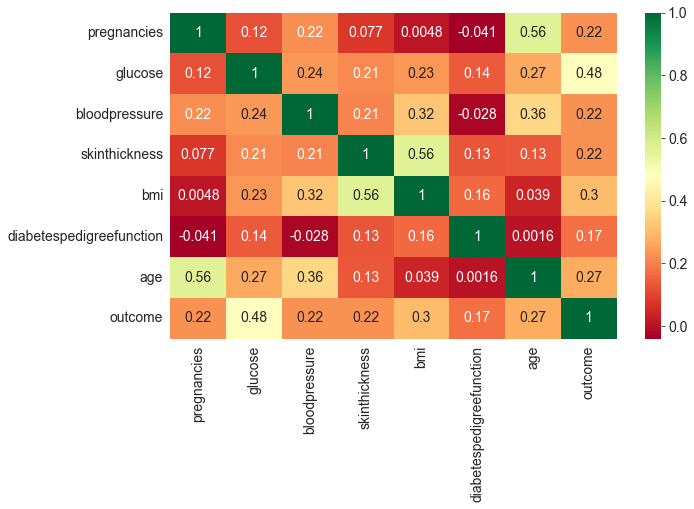

In [543]:
p=sns.heatmap(X_train_imputed.corr(), annot=True,cmap ='RdYlGn')

Berdasarkan hasil korelasi diatas kita bisa peroleh kesimpulan bahwa glucose, bmi, dan age adalah features yang memiliki korelasi tertinggi secara berurutan dengan outcome. Selanjutnya dari korelasi diatas kita akan gunakan semua features

#### Hyperparameter Tuning

Untuk meningkatkan performance model kita gunakan RepeatedKFold

In [615]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [616]:
"""liblinear small dataset
liblinear is limited to one-versus-rest schemes
penalty l1 and l2 reduce overfitting
C select random
"""

parameter_logreg = {
    "algo_logreg__penalty":  ['l1', 'l2'],
    "algo_logreg__C": [100, 10, 1.0, 0.1, 0.01],
    "algo_logreg__solver": ['liblinear']
}

model_logreg = GridSearchCV(pipeline_logreg, param_grid= parameter_logreg, cv = cv, n_jobs=-1, verbose=1)

In [617]:
best_logreg_model = model_logreg.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [618]:
"""
n_neighbors dari range(1, 5) 
jarak: euclidean, manhattan, dan minkowski.
Weight: uniform (bobot yang sama), distance tetangga yang paling dekat bobotnya lebih besar
"""
parameter_knn = {
    "algo_knn__n_neighbors":  range(1, 5, 2),
    "algo_knn__weights": ['uniform', 'distance'],
    "algo_knn__metric": ['euclidean', 'minkowski']
}

model_knn = GridSearchCV(pipeline_knn, param_grid= parameter_knn, cv = cv, n_jobs=-1, verbose=1)

In [619]:
best_knn_model = model_knn.fit(X_train, y_train)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


In [620]:
"""
criterion gini dan entropy sebagai fungsi untuk mengukur kualitas split, 
max_depth untuk menghindari overfit, 
min sample split dan min sample leaf digunkan untuk samples split dan jumlah minimum leaf node
"""

parameter_tree = {
    "algo_tree__criterion":  ['gini', 'entropy'],
    "algo_tree__max_depth": range(1, 10),
    "algo_tree__min_samples_split": range(1, 10),
    "algo_tree__min_samples_leaf": range(1, 5) 
}

model_tree = GridSearchCV(pipeline_tree, param_grid= parameter_tree, cv = cv, n_jobs=-1, verbose=1)

In [621]:
best_tree_model = model_tree.fit(X_train, y_train)

Fitting 30 folds for each of 648 candidates, totalling 19440 fits


In [622]:
"""
n_estimators atau jumlah pohon 100 dan 200,
max_features (jumlah features yang diperhatikan ketika melakukan split) sqrt dan log2
"""

parameter_rf = {
    "algo_rf__n_estimators":  [100, 200],
    "algo_rf__max_features": ['sqrt', 'log2']
}

model_rf = GridSearchCV(pipeline_rf, param_grid= parameter_rf, cv = cv, n_jobs=-1, verbose=1)

In [623]:
best_rf_model = model_rf.fit(X_train, y_train)

Fitting 30 folds for each of 4 candidates, totalling 120 fits


In [624]:
"""
Hyperparamter yang paling umum digunakan
"""
parameter_nb = {'algo_nb__var_smoothing': np.logspace(0,-9, num=100)}

model_nb = GridSearchCV(pipeline_nb, param_grid= parameter_nb, cv = cv, n_jobs=-1, verbose=1)

In [625]:
best_nb_model = model_nb.fit(X_train, y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [626]:
"""
n_estimators 100 dan 200,
Algorithms: SAMME, SAMME.R
bobot iterasi boosting: 0.1, 0.01, dan 0.001
"""

parameter_adaboost = {
    "algo_adaboost__n_estimators":  [100, 200],
    "algo_adaboost__algorithm": ['SAMME', 'SAMME.R'],
    "algo_adaboost__learning_rate": [0.1, 0.01, 0.001]
}

model_adaboost = GridSearchCV(pipeline_adaboost, param_grid= parameter_adaboost, cv = cv, n_jobs=-1, verbose=1)

In [627]:
best_adaboost_model = model_adaboost.fit(X_train, y_train)

Fitting 30 folds for each of 12 candidates, totalling 360 fits


### Evaluasi Model

##### Best Score dan Best Parameter

In [628]:
print("Logistic Regression: ", best_logreg_model.best_score_, best_logreg_model.best_params_)
print('-'*100)
print("KNN: ", best_knn_model.best_score_, best_knn_model.best_params_)
print('-'*100)
print("Decision Tree: ", best_tree_model.best_score_, best_tree_model.best_params_)
print('-'*100)
print("Random Forest: ", best_rf_model.best_score_, best_rf_model.best_params_)
print('-'*100)
print("Naive Bayes: ", best_nb_model.best_score_, best_nb_model.best_params_)
print('-'*100)
print("AdaBoost: ", best_adaboost_model.best_score_, best_adaboost_model.best_params_)

Logistic Regression:  0.77183908045977 {'algo_logreg__C': 100, 'algo_logreg__penalty': 'l1', 'algo_logreg__solver': 'liblinear'}
----------------------------------------------------------------------------------------------------
KNN:  0.7091954022988507 {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 3, 'algo_knn__weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Decision Tree:  0.7919540229885056 {'algo_tree__criterion': 'entropy', 'algo_tree__max_depth': 4, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Random Forest:  0.7816091954022988 {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 100}
----------------------------------------------------------------------------------------------------
Naive Bayes:  0.7626436781609194 {'algo_nb__var_smoothing': 0.0657933224657568}
--

In [629]:
imputer = imputer.fit(X_train)
X_test_imputed = imputer.transform(X_test)

Output X_test_imputed adalah array agar mempunyai tipe data yang sama dengan X_test maka kita akan rubah tipe data array ke dataframe

In [630]:
X_test_imputed = pd.DataFrame(X_test_imputed, columns= X_test.columns)
X_test_imputed.head()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,diabetespedigreefunction,age
0,7.0,181.0,84.0,21.0,35.9,0.586,51.0
1,3.0,113.0,50.0,10.0,29.5,0.626,25.0
2,0.0,126.0,84.0,29.0,30.7,0.520,24.0
3,0.0,179.0,50.0,36.0,37.8,0.455,22.0
4,10.0,94.0,72.0,18.0,23.1,0.595,56.0


In [631]:
y_pred_logreg = best_logreg_model.predict(X_test_imputed)
y_pred_knn = best_knn_model.predict(X_test_imputed)
y_pred_tree = best_tree_model.predict(X_test_imputed)
y_pred_rf = best_rf_model.predict(X_test_imputed)
y_pred_nb = best_nb_model.predict(X_test_imputed)
y_pred_adaboost = best_adaboost_model.predict(X_test_imputed)

classification_report Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        96
           1       0.71      0.54      0.61        50

    accuracy                           0.77       146
   macro avg       0.75      0.71      0.72       146
weighted avg       0.76      0.77      0.76       146

----------------------------------------------------------------------------------------------------


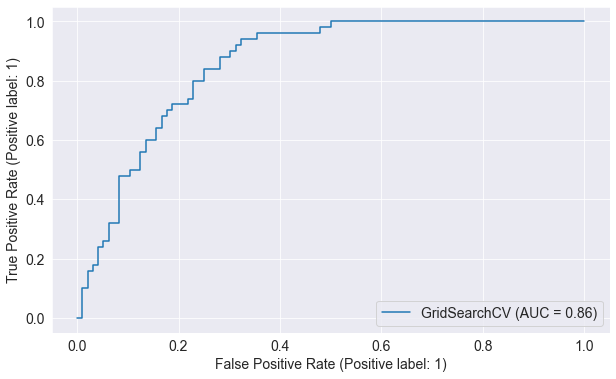

In [646]:
print("classification_report Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print('-'*100)
RocCurveDisplay.from_estimator(best_logreg_model, X_test, y_test)

classification_report KNN
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        96
           1       0.57      0.46      0.51        50

    accuracy                           0.70       146
   macro avg       0.66      0.64      0.65       146
weighted avg       0.69      0.70      0.69       146

----------------------------------------------------------------------------------------------------


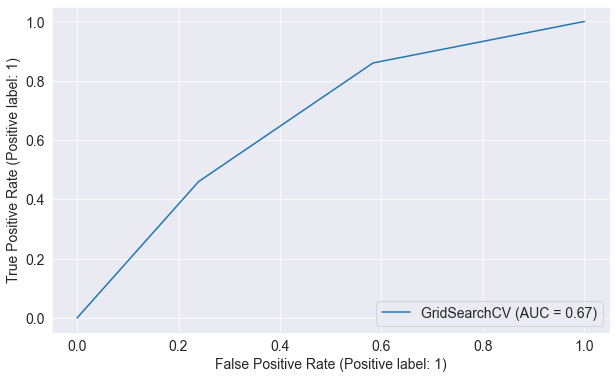

In [647]:
print("classification_report KNN")
print(classification_report(y_test, y_pred_knn))
print('-'*100)
RocCurveDisplay.from_estimator(best_knn_model, X_test, y_test)

classification_report decision Tree
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        96
           1       0.54      0.66      0.59        50

    accuracy                           0.69       146
   macro avg       0.67      0.68      0.67       146
weighted avg       0.71      0.69      0.70       146

----------------------------------------------------------------------------------------------------


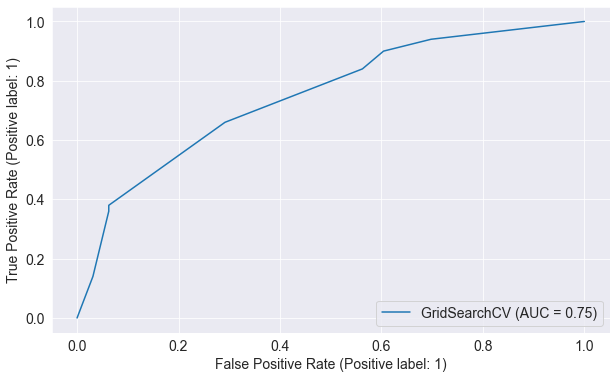

In [648]:
print("classification_report decision Tree")
print(classification_report(y_test, y_pred_tree))
print('-'*100)
RocCurveDisplay.from_estimator(best_tree_model, X_test, y_test)

classification_report Random forest
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        96
           1       0.60      0.56      0.58        50

    accuracy                           0.72       146
   macro avg       0.69      0.68      0.68       146
weighted avg       0.72      0.72      0.72       146

----------------------------------------------------------------------------------------------------


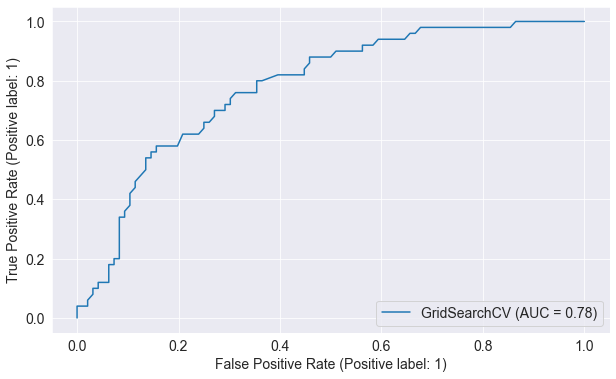

In [649]:
print("classification_report Random forest")
print(classification_report(y_test, y_pred_rf))
print('-'*100)
RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)


classification_report Naive Bayes
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        96
           1       0.73      0.54      0.62        50

    accuracy                           0.77       146
   macro avg       0.76      0.72      0.73       146
weighted avg       0.77      0.77      0.76       146

----------------------------------------------------------------------------------------------------


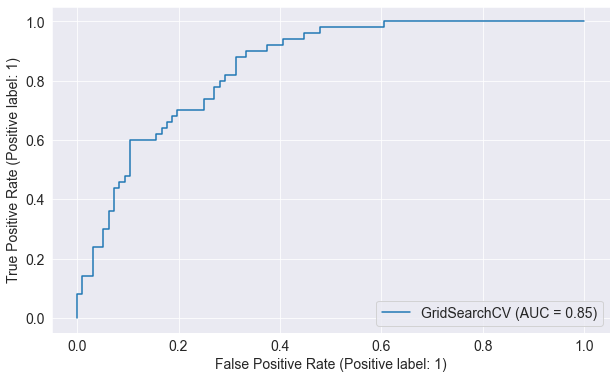

In [650]:
print("classification_report Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print('-'*100)
RocCurveDisplay.from_estimator(best_nb_model, X_test, y_test)

classification_report Adaboost
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        96
           1       0.69      0.58      0.63        50

    accuracy                           0.77       146
   macro avg       0.74      0.72      0.73       146
weighted avg       0.76      0.77      0.76       146

----------------------------------------------------------------------------------------------------


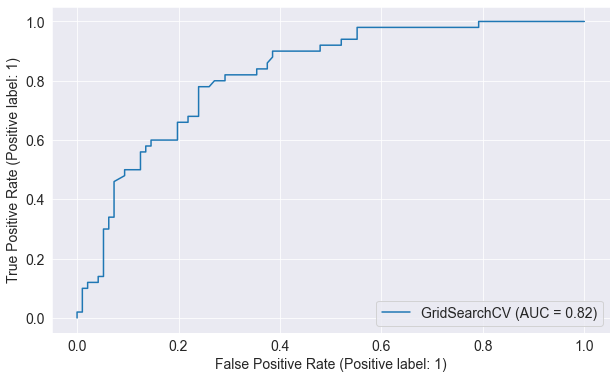

In [651]:
print("classification_report Adaboost")
print(classification_report(y_test, y_pred_adaboost))
print('-'*100)
RocCurveDisplay.from_estimator(best_adaboost_model, X_test, y_test)

##### Result

Evaluasi performa model menggunakan matrix berikut:
1. Accuracy Score
2. Precision
3. ROC AUC Curve
4. F-1 Score

In [659]:
result = pd.DataFrame(np.array([[best_logreg_model.best_score_, 0.71, 0.61, 0.86], [best_knn_model.best_score_, 0.57, 0.51, 0.67],
[best_tree_model.best_score_, 0.54, 0.59, 0.75], [best_rf_model.best_score_,0.60, 0.58, 0.78],[best_nb_model.best_score_, 0.73, 0.62, 0.85],
[best_adaboost_model.best_score_, 0.69, 0.63, 0.82]
]), columns=['Accuracy_score', 'Precision', 'ROC_AUC score', 'F-1 score'], index=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'AdaBoost'])

In [660]:
result

,Accuracy_score,Precision,ROC_AUC score,F-1 score
Logistic Regression,0.771839,0.71,0.61,0.86
KNN,0.709195,0.57,0.51,0.67
Decision Tree,0.791379,0.54,0.59,0.75
Random Forest,0.786782,0.60,0.58,0.78
Naive Bayes,0.762644,0.73,0.62,0.85
AdaBoost,0.771839,0.69,0.63,0.82


Berdasarkan nilai performance metric maka kita gunakan model Logistic Regression sebagai model yang akan kita gunakan selanjutnya  

### Model Saving

In [661]:
# save model
import pickle
filename= open("model_logreg.pkl", "wb") #write binary
pickle.dump(best_logreg_model, filename)
filename.close()

### Model Inference

In [662]:
# Gunakan model kita yang telah di save
with open("model_logreg.pkl", "rb") as filename:
    model_logreg = pickle.load(filename)

In [663]:
# contoh data
X_train.iloc[0:1]

,pregnancies,glucose,bloodpressure,skinthickness,bmi,diabetespedigreefunction,age
80,2,100,68,25,38.5,0.324,26


In [664]:
data = [
        [5, 90, 100, 30, 40, 0.1, 31],
        [10, 30, 120, 20, 60, 0.5, 21]
      ]
X_pred = pd.DataFrame(data, index=[1, 2], columns=X.columns)
X_pred

,pregnancies,glucose,bloodpressure,skinthickness,bmi,diabetespedigreefunction,age
1,5,90,100,30,40,0.1,31
2,10,30,120,20,60,0.5,21


In [665]:
model_logreg.predict(X_pred)

array([0, 0], dtype=int64)

### Pengambilan Kesimpulan

Diabetes Militus merupakan penyakit yang dapat menimbulkan banyak komplikasi. Cara tepat memprediksi dan mendiagnosis penyakit ini dengan menggunakan machine learning sangat bermanfaat. Berdasarkan semua percobaan diatas kita memilih
Model Logistic Regression dengan accuracy score 0, 77, precision 0.71, ROC AUC score 0.61, dan F1-Score 0.86 yang dapat menunjukkan bahwa model dapat digunakan untuk prediski diabetes. Glucose merupakan faktor yang penting untuk memprediksi penyakit ini namun memiliki kinerja yang lebih baik lagi ketika digunakan faktor-faktor yang lain. Performa model akan jauh lebih baik lagi jika terdapat banyak sample data yang digunakan.